Importing needed libraries

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy.random as npr
import pca_eigenfaces as pca

Loading data and applying z-score

In [2]:
data = sio.loadmat(r"data/dado1.mat")["X"]
m, n = data.shape
norm_data, mu, sigma = pca.zscore(data)

Showing 100 random faces from the database with cold colormap

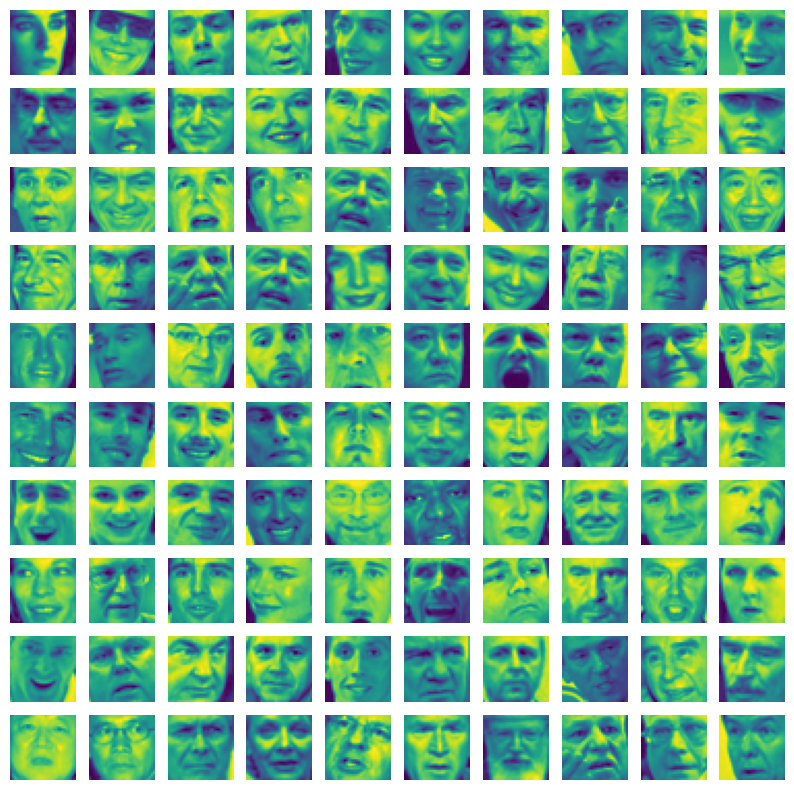

In [3]:
faces_index = []
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for ax in axs.flatten():
    rand_ind = npr.randint(0, m)
    rand_img = data[rand_ind]
    rand_face = pca.img_from_vector(rand_img)
    ax.imshow(rand_face)
    ax.axis("off")
    faces_index.append(rand_ind)

Principal Component Analysis of the database and compressing/decompressing the data

In [4]:
variance_to_retain = 0.99
U, S, k, r = pca.pca(norm_data, variance_to_retain)
compressed_data = pca.compress(norm_data, U_r=U[:, :k])
decompressed_data = pca.decompress(compressed_data, U_r=U[:, :k])
print(f"For {variance_to_retain*100}% retained variance, we must use k = {k}")
print(f"The rank of the covariance matrix is r = {r}")

For 99.0% retained variance, we must use k = 335
The rank of the covariance matrix is r = 1024


Displaying the original 100 faces only considering the k first principal components

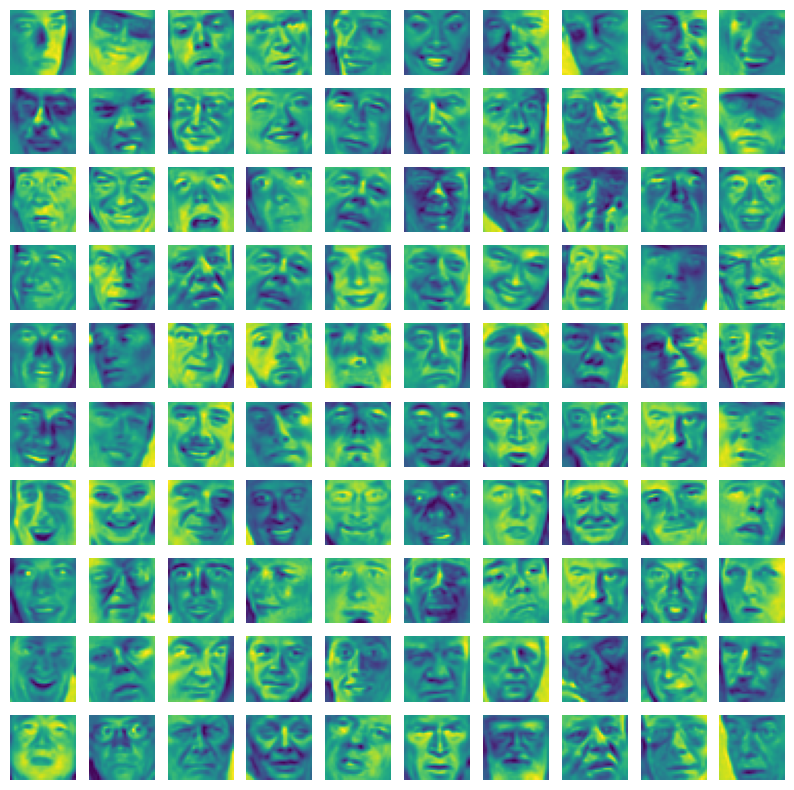

In [5]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in zip(faces_index, axs.flatten()):
    decompressed_img = decompressed_data[i]
    decompressed_face = pca.img_from_vector(decompressed_img)
    ax.imshow(decompressed_face)
    ax.axis("off")

Showing the 36 first principal components as images

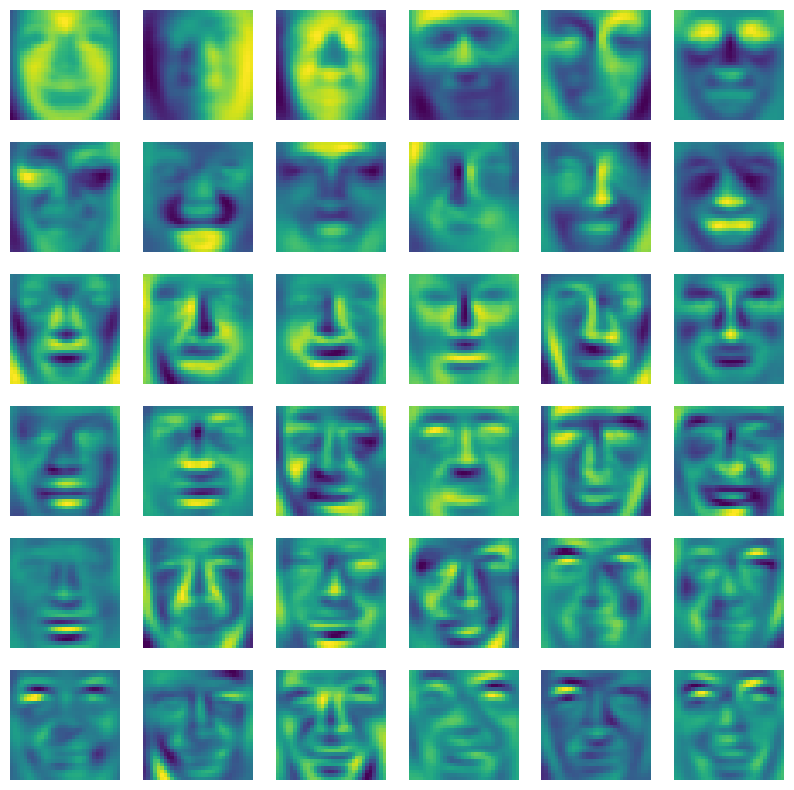

In [6]:
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
for j, ax in zip(range(36), axs.flatten()):
    principal_component_j = pca.img_from_vector(U[:, j])
    ax.imshow(principal_component_j)
    ax.axis("off")

Another 100 random faces paired with the recovered version from projected with k = 100

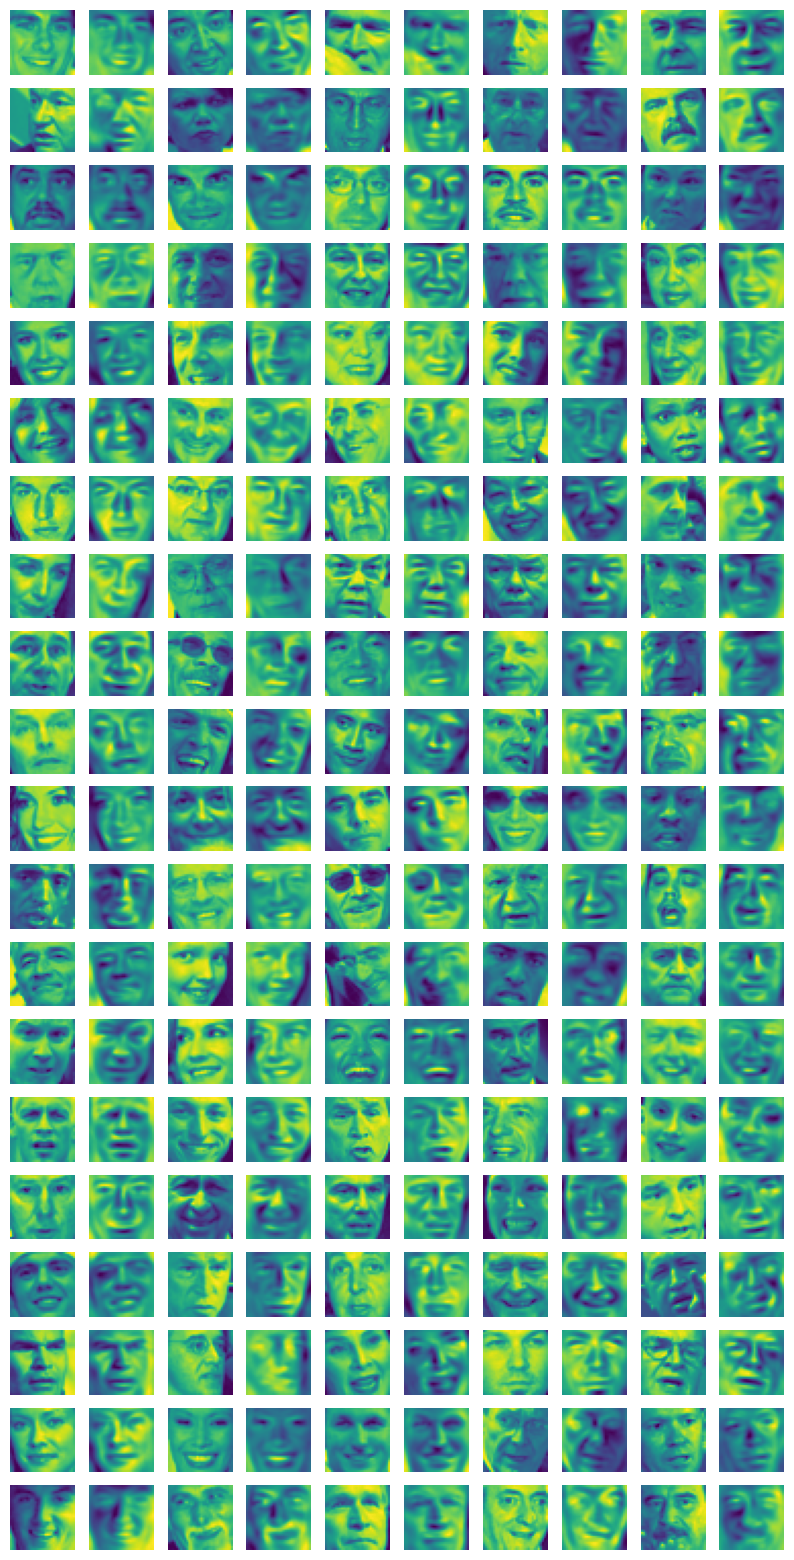

In [7]:
k = 100
projected_data = pca.compress(norm_data, U_r=U[:, :k])
recovered_data = pca.decompress(projected_data, U_r=U[:, :k])
faces_index = []
fig, axs = plt.subplots(20, 10, figsize=(10, 20))
for i, ax in zip(range(200), axs.flatten()):
    if i % 2 == 0:
        rand_ind = npr.randint(0, m)
        og_img = data[rand_ind]
        og_face = pca.img_from_vector(og_img)
        ax.imshow(og_face)
        ax.axis("off")
        faces_index.append(rand_ind)
    else:
        j = i - 1 - i // 2
        index = faces_index[j]
        recovered_img = recovered_data[index]
        recovered_face = pca.img_from_vector(recovered_img)
        ax.imshow(recovered_face)
        ax.axis("off")